In [57]:
import pickle
import os

def loadPickle(file_path: str) -> pickle:
    with open(file_path, "rb") as f:
        pk = pickle.load(f)
    return pk

In [153]:
min_len = 10000000
filename = ""
for sample in os.listdir("../NICT/DataSet/Toyset/OpcodeSequence_retdec/Level_10/malware/Lv_100/"):
    ops = loadPickle("../NICT/DataSet/Toyset/OpcodeSequence_retdec/Level_10/malware/Lv_100/" + sample)
    if len(ops) > 1000 and len(ops) < min_len:
        min_len = len(ops)
        filename = sample

print(min_len)
print(filename)

1024
00b8f55d5240c8bc5f91eab1a90ed60ac6bd4150f83b203e856ea8320c75640f.pickle


In [154]:
sampleName = "00b8f55d5240c8bc5f91eab1a90ed60ac6bd4150f83b203e856ea8320c75640f.pickle"
ori_sample = "../NICT/DataSet/Toyset/OpcodeSequence_retdec/toy_malware_unpacked/" + sampleName
packed_sample = "../NICT/DataSet/Toyset/OpcodeSequence_retdec/Level_10/malware/Lv_100/" + sampleName

packed_OPS = loadPickle(packed_sample)
ori_OPS = loadPickle(ori_sample)

label = []
# GOP 0, ROP 1
for op in packed_OPS:
    if op in set(ori_OPS):
        label.append(0)
    else:
        label.append(1)
print(len(label))
print(sum(label))
print((len(label)-sum(label))/len(label))

1024
2
0.998046875


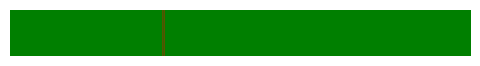

In [155]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from  matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
plt.rcParams["figure.figsize"] = 5,1

x = np.linspace(0,len(label))
y = np.array(label)

fig, ax = plt.subplots(nrows=1, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
cmap=LinearSegmentedColormap.from_list('gr',["g", "r"], N=256) 
ax.imshow(y[np.newaxis,:], cmap=cmap, aspect="auto", extent=extent)
ax.set_yticks([])

plt.tight_layout()
plt.axis("off")
plt.savefig("./GOPvisual_fig/malware_100",bbox_inches="tight", pad_inches = -0.2)
plt.show()